**Abstract** <br>
Use image dataset to buid a deep learning model using CNN and observe how making changes to the network effect the the accuracy of the model

**Importing Data**

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
import zipfile
with zipfile.ZipFile('/gdrive/MyDrive/archive (3).zip', 'r') as zip_ref:
    zip_ref.extractall('gdrive/MyDrive/')

Mounted at /gdrive


**Train-Test Split**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(rescale=1./255,validation_split = 0.2,zoom_range=(0.99,0.99),dtype=tf.float32)

In [ ]:
train = gen.flow_from_directory('/content/gdrive/MyDrive/data/',
                               target_size = (150,150),
                               batch_size = 256,
                               class_mode = "binary",
                               color_mode = "rgb",
                               shuffle = True,
                               seed = 123,
                               subset = "training")

Found 6043 images belonging to 2 classes.


In [ ]:
test = gen.flow_from_directory('/content/gdrive/MyDrive/data/',
                               target_size = (150,150),
                               batch_size = 8,
                               class_mode = "binary",
                               color_mode = "rgb",
                               shuffle = True,
                               seed = 123,
                               subset = "validation")

Found 1510 images belonging to 2 classes.


**Understanding the Data** <br>
We are using the FaceMask detection dataset. Here we are visualizing how the data is distributed between "with mask" and "without mask"

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


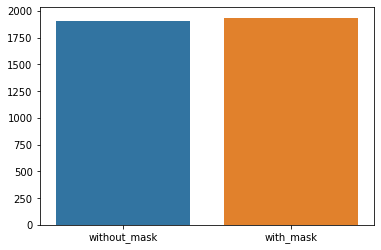

In [ ]:

import seaborn as sns
t=0
h=0
for i in range(15):
    a, b = next(train)
    for j in b:
        if j == 1:
            h+=1
        else:t+=1

sns.barplot(x=['without_mask','with_mask'],y=[t,h])

In [ ]:
import matplotlib.pyplot as plt

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
      #  ax.title(train.labels[0])
    plt.tight_layout()
    plt.show()

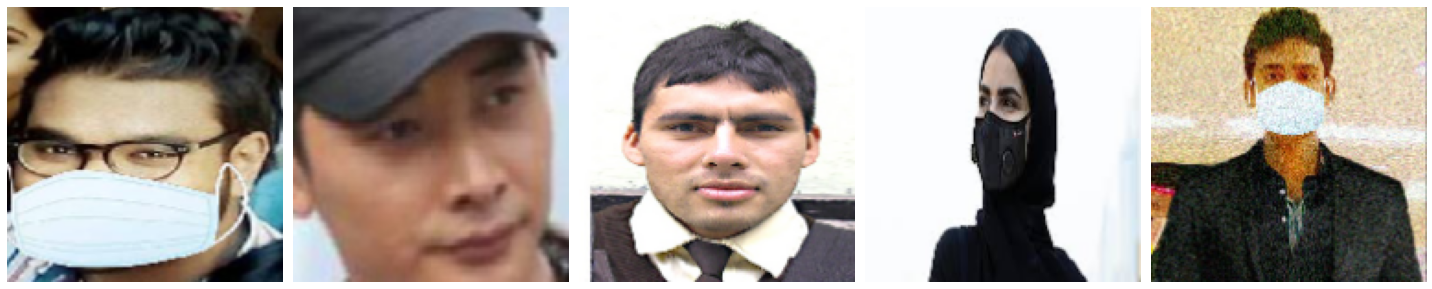

In [ ]:
sample_training_images, _ = next(train)
plotImages(sample_training_images[:5])

In [ ]:
import numpy as np

def show_images(image_gen):
    test_dict = test.class_indices
    classes = list(test_dict.keys())
    images, labels=next(image_gen) # get a sample batch from the generator 
    plt.figure(figsize=(20,20))
    length = len(labels)
    if length<25:
        r=length
    else:
        r=25
    for i in range(r):
        plt.subplot(5,5,i+1)                                                                                                                              
        image=(images[i]+1)/2 #scale images between 0 and 1
        plt.imshow(image)
        index=np.argmax(labels[i])
        class_name=classes[index]
        plt.title(class_name, color="green",fontsize=16)
        plt.axis('off')
    plt.show()

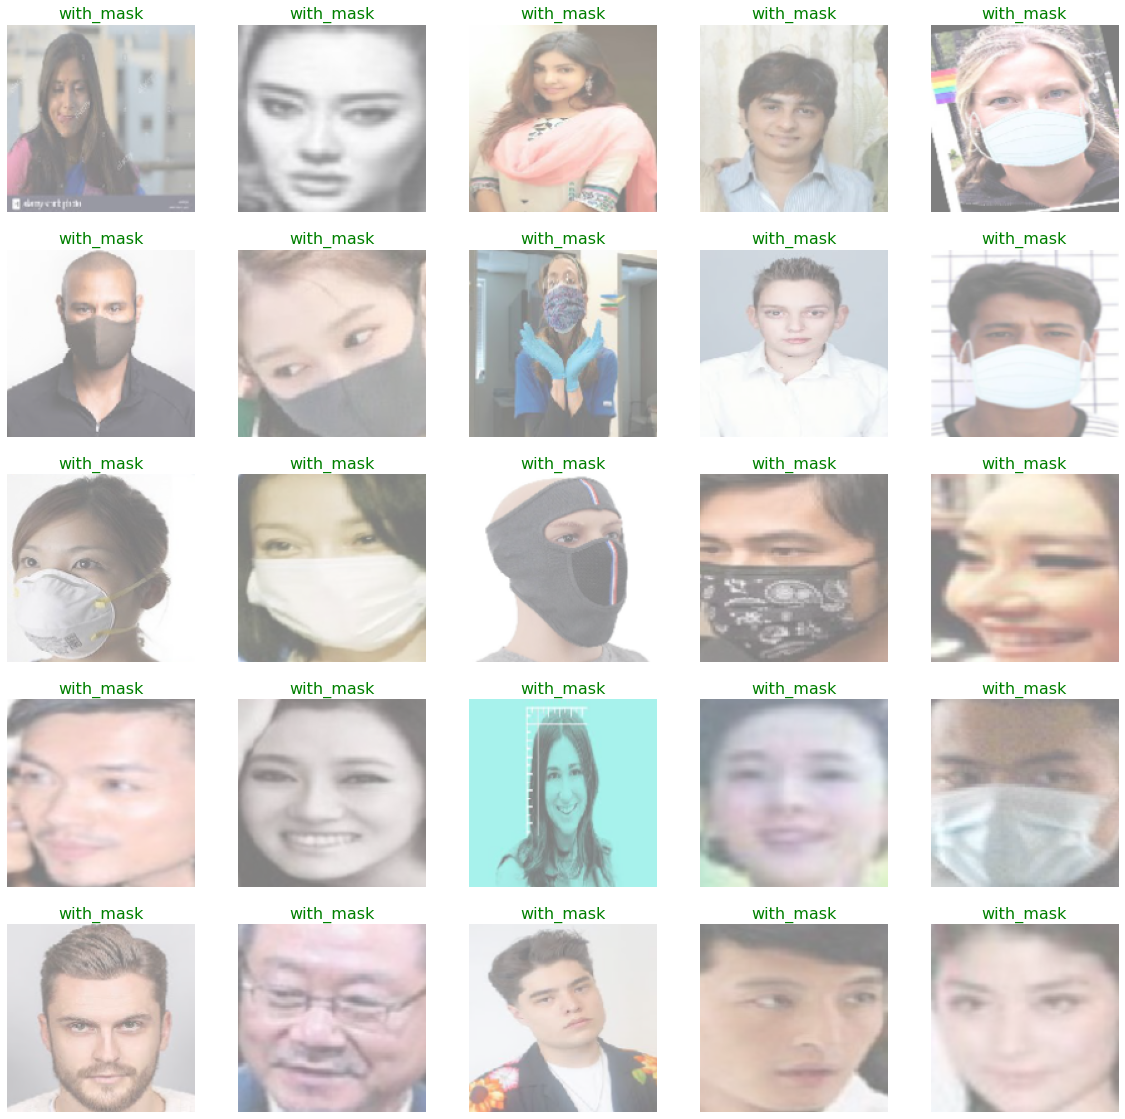

In [ ]:
show_images(train)

**Building and Comparing Models**

Importing some necessary libraries

In [ ]:
from tensorflow.keras import layers  
from keras.layers import Conv2D, MaxPool2D, LeakyReLU, BatchNormalization, Dropout, Dense, InputLayer, Flatten,ReLU
from keras.losses import BinaryCrossentropy
from keras.optimizers import *
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU
from keras import utils, callbacks

To stop training when val_loss has stopped improving. As the goal of a training is to minimize the loss, I have used early stopping defined below



In [ ]:
earlystopping = callbacks.EarlyStopping(monitor="val_loss", mode="min", 
                                        patience=5, restore_best_weights = True)

Function to plot the accuracy and loss charts

In [ ]:
import matplotlib.pyplot as plt

def show_accPlot(historymodel):
  acc = historymodel.history["accuracy"] # report of model
  val_acc = historymodel.history["val_accuracy"] # history of validation data

  loss = historymodel.history["loss"]        # Training loss
  val_loss = historymodel.history["val_loss"] # validation loss

  plt.figure(figsize=(8,8))
  plt.subplot(2,1,1) # 2 rows and 1 columns

  plt.subplot(2,1,1)
  #plotting respective accuracy
  plt.plot(acc,label="Training Accuracy")
  plt.plot(val_acc, label="Validation Acccuracy")
  plt.plot(val_loss, label = "Validation Loss")
  plt.legend()
  plt.ylabel("Accuracy", fontsize=12)


Created a base model to keep updating the network and observing changes comparing to this model

In [ ]:
#BaseModel with binarycrossentropy
modeldem2 = keras.Sequential()
modeldem2.add(InputLayer(input_shape=(150,150,3)))
modeldem2.add(Conv2D(filters=32,kernel_size=3, activation="relu", padding="same"))
modeldem2.add(MaxPool2D())



modeldem2.add(Flatten())


modeldem2.add(Dense(64, activation="relu"))
modeldem2.add(BatchNormalization())
modeldem2.add(Dropout(rate=0.3))
modeldem2.add(Dense(1, activation="sigmoid"))



modeldem2.compile(loss=tf.keras.losses.binary_crossentropy, optimizer=tf.optimizers.Adam(),metrics=['accuracy'])

historydem2 = modeldem2.fit(train,verbose=1,callbacks = [earlystopping],epochs=20,validation_data=(test))

Epoch 1/20
 1/24 [>.............................] - ETA: 1:10 - loss: 0.8837 - accuracy: 0.4727

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


24/24 [==============================] - 57s 2s/step - loss: 0.8125 - accuracy: 0.6682 - val_loss: 1.1161 - val_accuracy: 0.6576
Epoch 2/20
24/24 [==============================] - 56s 2s/step - loss: 0.4271 - accuracy: 0.8205 - val_loss: 0.3688 - val_accuracy: 0.8377
Epoch 3/20
24/24 [==============================] - 56s 2s/step - loss: 0.3014 - accuracy: 0.8850 - val_loss: 0.2857 - val_accuracy: 0.8921
Epoch 4/20
24/24 [==============================] - 56s 2s/step - loss: 0.2524 - accuracy: 0.9052 - val_loss: 0.2775 - val_accuracy: 0.8887
Epoch 5/20
24/24 [==============================] - 55s 2s/step - loss: 0.2099 - accuracy: 0.9247 - val_loss: 0.2526 - val_accuracy: 0.9179
Epoch 6/20
24/24 [==============================] - 56s 2s/step - loss: 0.1797 - accuracy: 0.9398 - val_loss: 0.3096 - val_accuracy: 0.8709
Epoch 7/20
24/24 [==============================] - 55s 2s/step - loss: 0.1471 - accuracy: 0.9555 - val_loss: 0.2435 - val_accuracy: 0.9212
Epoch 8/20
24/24 [=============

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


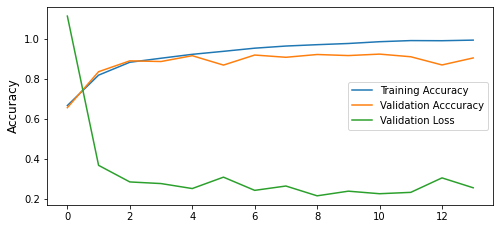

In [ ]:
show_accPlot(historydem2)

We can observe that the model performed well on the training data but not as well on the validation data which means the model is overfitting in this case. Training stopped at 14 epochs as val_loss would stop improving.

**Comparing Activation Functions**<br>
Comparing RELU and LeakyRELU

Epoch 1/20
 9/24 [==========>...................] - ETA: 27s - loss: 1.8322 - accuracy: 0.6260

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


24/24 [==============================] - 58s 2s/step - loss: 1.3159 - accuracy: 0.7015 - val_loss: 2.9059 - val_accuracy: 0.6199
Epoch 2/20
24/24 [==============================] - 56s 2s/step - loss: 0.5917 - accuracy: 0.8226 - val_loss: 1.2357 - val_accuracy: 0.7033
Epoch 3/20
24/24 [==============================] - 56s 2s/step - loss: 0.4342 - accuracy: 0.8340 - val_loss: 0.6810 - val_accuracy: 0.7384
Epoch 4/20
24/24 [==============================] - 56s 2s/step - loss: 0.3618 - accuracy: 0.8537 - val_loss: 0.3085 - val_accuracy: 0.8801
Epoch 5/20
24/24 [==============================] - 67s 3s/step - loss: 0.3272 - accuracy: 0.8651 - val_loss: 0.2977 - val_accuracy: 0.8828
Epoch 6/20
24/24 [==============================] - 56s 2s/step - loss: 0.3009 - accuracy: 0.8805 - val_loss: 0.2951 - val_accuracy: 0.8841
Epoch 7/20
24/24 [==============================] - 56s 2s/step - loss: 0.2749 - accuracy: 0.8886 - val_loss: 0.2399 - val_accuracy: 0.9046
Epoch 8/20
24/24 [=============

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


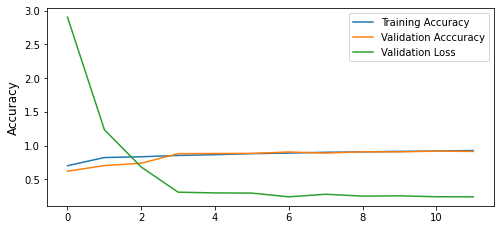

In [ ]:
modelLRelu = keras.Sequential()
modelLRelu.add(InputLayer(input_shape=(150,150,3)))
modelLRelu.add(Conv2D(filters=32,kernel_size=3, activation=LeakyReLU(), padding="same"))
modelLRelu.add(MaxPool2D())



modelLRelu.add(Flatten())


modelLRelu.add(Dense(64, activation=LeakyReLU()))
modelLRelu.add(BatchNormalization())
modelLRelu.add(Dropout(rate=0.3))
modelLRelu.add(Dense(1, activation="sigmoid"))



modelLRelu.compile(loss=keras.losses.binary_crossentropy, optimizer=tf.optimizers.Adam(),metrics=['accuracy'])

historyLRelu = modelLRelu.fit(train,verbose=1,callbacks = [earlystopping],epochs=20,validation_data=(test))
show_accPlot(historyLRelu)

Using LeakyRELU, we have almost same accuracies on train and test which means it is a good fit. Compared to RELU, the network has plateaued two epochs earlier. There is also a slight bump in the accuracy.

**Comparing Loss Functions**<br>
Comparing Hingeloss with BinaryEntropyLoss

Epoch 1/20
 3/24 [==>...........................] - ETA: 40s - loss: 0.8863 - accuracy: 0.6081

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


24/24 [==============================] - 58s 2s/step - loss: 0.8052 - accuracy: 0.6987 - val_loss: 0.8222 - val_accuracy: 0.6715
Epoch 2/20
24/24 [==============================] - 56s 2s/step - loss: 0.6898 - accuracy: 0.8176 - val_loss: 0.6333 - val_accuracy: 0.8609
Epoch 3/20
24/24 [==============================] - 56s 2s/step - loss: 0.6420 - accuracy: 0.8666 - val_loss: 0.5947 - val_accuracy: 0.9026
Epoch 4/20
24/24 [==============================] - 57s 2s/step - loss: 0.6144 - accuracy: 0.8888 - val_loss: 0.6551 - val_accuracy: 0.8470
Epoch 5/20
24/24 [==============================] - 56s 2s/step - loss: 0.6055 - accuracy: 0.8969 - val_loss: 0.7212 - val_accuracy: 0.7887
Epoch 6/20
24/24 [==============================] - 56s 2s/step - loss: 0.5953 - accuracy: 0.9098 - val_loss: 0.6082 - val_accuracy: 0.8960
Epoch 7/20
24/24 [==============================] - 56s 2s/step - loss: 0.5870 - accuracy: 0.9166 - val_loss: 0.5851 - val_accuracy: 0.9212
Epoch 8/20
24/24 [=============

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


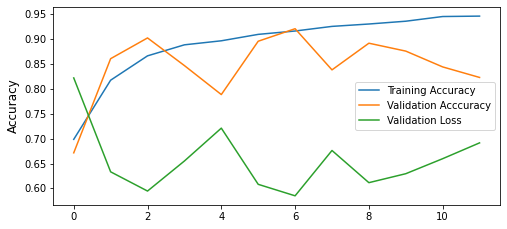

In [ ]:
modelhingeloss = keras.Sequential()
modelhingeloss.add(InputLayer(input_shape=(150,150,3)))
modelhingeloss.add(Conv2D(filters=32,kernel_size=3, activation="relu", padding="same"))
modelhingeloss.add(MaxPool2D())



modelhingeloss.add(Flatten())


modelhingeloss.add(Dense(64, activation="relu"))
modelhingeloss.add(BatchNormalization())
modelhingeloss.add(Dropout(rate=0.3))
modelhingeloss.add(Dense(1, activation="sigmoid"))



modelhingeloss.compile(loss=keras.losses.categorical_hinge, optimizer=tf.optimizers.Adam(),metrics=['accuracy'])

historyhinge = modelhingeloss.fit(train,verbose=1,callbacks = [earlystopping],epochs=20,validation_data=(test))
show_accPlot(historyhinge)

Using Hinge Loss function, we have a overfitting model. The model performed badly when compared to the binary crossentropy loss function. This network plateaued 2 epochs earlier than the model using binary crossentropy.

**Comparing Epochs**<br>
Comparing 20 and 10 epochs

10 Epochs

Epoch 1/10
 4/24 [====>.........................] - ETA: 37s - loss: 0.7753 - accuracy: 0.6152

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


24/24 [==============================] - 58s 2s/step - loss: 0.5048 - accuracy: 0.7687 - val_loss: 0.3029 - val_accuracy: 0.8934
Epoch 2/10
24/24 [==============================] - 57s 2s/step - loss: 0.3030 - accuracy: 0.8775 - val_loss: 0.3506 - val_accuracy: 0.8583
Epoch 3/10
24/24 [==============================] - 57s 2s/step - loss: 0.2398 - accuracy: 0.9029 - val_loss: 0.2123 - val_accuracy: 0.9238
Epoch 4/10
24/24 [==============================] - 57s 2s/step - loss: 0.1911 - accuracy: 0.9292 - val_loss: 0.2483 - val_accuracy: 0.9060
Epoch 5/10
24/24 [==============================] - 57s 2s/step - loss: 0.1569 - accuracy: 0.9416 - val_loss: 0.2289 - val_accuracy: 0.9225
Epoch 6/10
24/24 [==============================] - 57s 2s/step - loss: 0.1295 - accuracy: 0.9533 - val_loss: 0.2001 - val_accuracy: 0.9298
Epoch 7/10
24/24 [==============================] - 57s 2s/step - loss: 0.1062 - accuracy: 0.9662 - val_loss: 0.2647 - val_accuracy: 0.8993
Epoch 8/10
24/24 [=============

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


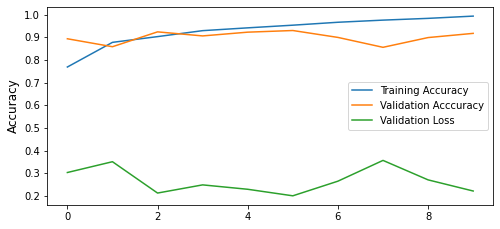

In [ ]:
modelEpochs10 = keras.Sequential()
modelEpochs10.add(InputLayer(input_shape=(150,150,3)))
modelEpochs10.add(Conv2D(filters=32,kernel_size=3, activation="relu", padding="same"))
modelEpochs10.add(MaxPool2D())



modelEpochs10.add(Flatten())


modelEpochs10.add(Dense(64, activation="relu"))
modelEpochs10.add(BatchNormalization())
modelEpochs10.add(Dropout(rate=0.3))
modelEpochs10.add(Dense(1, activation="sigmoid"))



modelEpochs10.compile(loss=keras.losses.binary_crossentropy, optimizer=tf.optimizers.Adam(),metrics=['accuracy'])

historyEpochs10 = modelEpochs10.fit(train,verbose=1,epochs=10,validation_data=(test))
show_accPlot(historyEpochs10)

We can observe here that the model is slightly overfitting. Compared to model with 20 epochs this is less overfitting and the accuracy is similar. For 20 epochs, the model plateaus after 14 epochs.

**Comparing Gradiant Estimation techniques** <br>
Comparing AdaptiveGradientDescent to Adam optimizer

In [ ]:
modelAdagrad = keras.Sequential()
modelAdagrad.add(InputLayer(input_shape=(150,150,3)))
modelAdagrad.add(Conv2D(filters=32,kernel_size=3, activation="relu", padding="same"))
modelAdagrad.add(MaxPool2D())



modelAdagrad.add(Flatten())


modelAdagrad.add(Dense(64, activation="relu"))
modelAdagrad.add(BatchNormalization())
modelAdagrad.add(Dropout(rate=0.3))
modelAdagrad.add(Dense(1, activation="sigmoid"))



modelAdagrad.compile(loss=keras.losses.binary_crossentropy, optimizer=tf.keras.optimizers.Adagrad(
    learning_rate=0.001, initial_accumulator_value=0.1, epsilon=1e-07,
    name='Adagrad'),metrics=['accuracy'])

historyAdagrad = modelAdagrad.fit(train,verbose=1,callbacks = [earlystopping],epochs=20,validation_data=(test))
show_accPlot(historyAdagrad)

NameError: ignored

Model using AdaptiveGradientDescent (Adagrad) is slightly more overfitting than the model using Adam optimizer. We can observe a lot of variations in val_loss over several epochs. Accuracy  wise, model using Adam optimizer performed better. And the network seems to plateau after 20 epochs compared to 14 epochs using Adam optimizer.

**Changing Network Architecture** <br>
Adding an extra layer than my base model

Epoch 1/20
19/24 [======================>.......] - ETA: 9s - loss: 0.4704 - accuracy: 0.7871 

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


24/24 [==============================] - 66s 2s/step - loss: 0.4371 - accuracy: 0.8046 - val_loss: 0.2874 - val_accuracy: 0.8960
Epoch 2/20
24/24 [==============================] - 58s 2s/step - loss: 0.2463 - accuracy: 0.8991 - val_loss: 0.2275 - val_accuracy: 0.9212
Epoch 3/20
24/24 [==============================] - 58s 2s/step - loss: 0.1837 - accuracy: 0.9283 - val_loss: 0.1813 - val_accuracy: 0.9338
Epoch 4/20
24/24 [==============================] - 57s 2s/step - loss: 0.1394 - accuracy: 0.9484 - val_loss: 0.2920 - val_accuracy: 0.8762
Epoch 5/20
24/24 [==============================] - 58s 2s/step - loss: 0.1154 - accuracy: 0.9568 - val_loss: 0.3561 - val_accuracy: 0.8411
Epoch 6/20
24/24 [==============================] - 57s 2s/step - loss: 0.0839 - accuracy: 0.9725 - val_loss: 0.1497 - val_accuracy: 0.9450
Epoch 7/20
24/24 [==============================] - 57s 2s/step - loss: 0.0672 - accuracy: 0.9790 - val_loss: 0.1711 - val_accuracy: 0.9377
Epoch 8/20
24/24 [=============

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


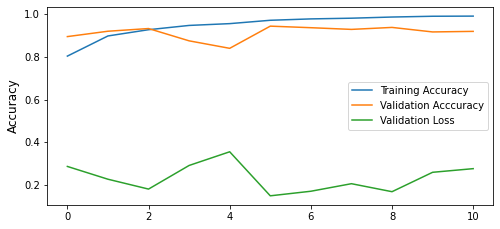

In [ ]:
modelExtLayer = keras.Sequential()
modelExtLayer.add(InputLayer(input_shape=(150,150,3)))
modelExtLayer.add(Conv2D(filters=32,kernel_size=3, activation="relu", padding="same"))
modelExtLayer.add(MaxPool2D())
modelExtLayer.add(Conv2D(filters=64,kernel_size=3, activation="relu", padding="same"))
modelExtLayer.add(MaxPool2D())


modelExtLayer.add(Flatten())


modelExtLayer.add(Dense(128, activation='relu'))
modelExtLayer.add(BatchNormalization())
modelExtLayer.add(Dropout(rate=0.3))
modelExtLayer.add(Dense(64, activation="relu"))
modelExtLayer.add(BatchNormalization())
modelExtLayer.add(Dropout(rate=0.3))
modelExtLayer.add(Dense(1, activation="sigmoid"))



modelExtLayer.compile(loss=keras.losses.binary_crossentropy, optimizer=tf.optimizers.Adam(),metrics=['accuracy'])

historyExtLayer = modelExtLayer.fit(train,verbose=1,callbacks = [earlystopping],epochs=20,validation_data=(test))
show_accPlot(historyExtLayer)

After adding an extra layer, the network got plateaud 1 epoch earlier than the base model. This network has higher accuracy than the base model but is slightly more overfitting.

**Comparing Network Initialization**<br>
Comparing Ones Initialization with Xavier Initialization

Ones Initializer

Epoch 1/20
 8/24 [=========>....................] - ETA: 31s - loss: 23.0832 - accuracy: 0.5244

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


24/24 [==============================] - 57s 2s/step - loss: 16.3777 - accuracy: 0.6229 - val_loss: 80.8296 - val_accuracy: 0.5278
Epoch 2/20
24/24 [==============================] - 56s 2s/step - loss: 10.4039 - accuracy: 0.7059 - val_loss: 65.7108 - val_accuracy: 0.5278
Epoch 3/20
24/24 [==============================] - 56s 2s/step - loss: 9.5241 - accuracy: 0.7198 - val_loss: 50.4902 - val_accuracy: 0.5338
Epoch 4/20
24/24 [==============================] - 56s 2s/step - loss: 8.9497 - accuracy: 0.7241 - val_loss: 38.4969 - val_accuracy: 0.5477
Epoch 5/20
24/24 [==============================] - 56s 2s/step - loss: 8.4050 - accuracy: 0.7281 - val_loss: 38.5633 - val_accuracy: 0.5424
Epoch 6/20
24/24 [==============================] - 56s 2s/step - loss: 7.8798 - accuracy: 0.7339 - val_loss: 18.1238 - val_accuracy: 0.6066
Epoch 7/20
24/24 [==============================] - 56s 2s/step - loss: 7.4099 - accuracy: 0.7332 - val_loss: 17.0421 - val_accuracy: 0.6066
Epoch 8/20
24/24 [====

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


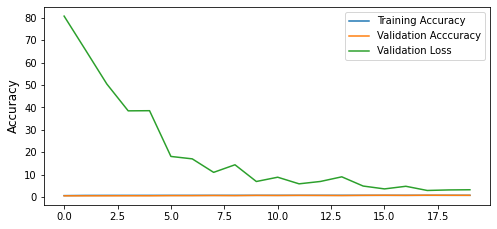

In [ ]:
initializer_ones = tf.keras.initializers.Ones();
modelinit1 = keras.Sequential()
modelinit1.add(InputLayer(input_shape=(150,150,3)))
modelinit1.add(Conv2D(filters=32,kernel_size=3, activation="relu", padding="same"))
modelinit1.add(MaxPool2D())



modelinit1.add(Flatten())


modelinit1.add(Dense(64, activation="relu",kernel_initializer=initializer_ones))
modelinit1.add(BatchNormalization())
modelinit1.add(Dropout(rate=0.3))
modelinit1.add(Dense(1, activation="sigmoid",kernel_initializer=initializer_ones))



modelinit1.compile(loss=keras.losses.binary_crossentropy, optimizer=tf.optimizers.Adam(),metrics=['accuracy'])

historyinit1 = modelinit1.fit(train,verbose=1,callbacks = [earlystopping],epochs=20,validation_data=(test))
show_accPlot(historyinit1)

By initializing with Ones, the accuracy of the model is severely hit. The network starts plateueing after 20 epochs. 

Xavier Initialization

Epoch 1/20
 2/24 [=>............................] - ETA: 40s - loss: 3.0081 - accuracy: 0.7656

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


24/24 [==============================] - 55s 2s/step - loss: 3.4121 - accuracy: 0.7543 - val_loss: 2.8545 - val_accuracy: 0.7642
Epoch 2/20
24/24 [==============================] - 55s 2s/step - loss: 3.2225 - accuracy: 0.7564 - val_loss: 2.3798 - val_accuracy: 0.7854
Epoch 3/20
24/24 [==============================] - 55s 2s/step - loss: 3.0248 - accuracy: 0.7562 - val_loss: 2.2127 - val_accuracy: 0.7894
Epoch 4/20
24/24 [==============================] - 55s 2s/step - loss: 2.8795 - accuracy: 0.7567 - val_loss: 2.3063 - val_accuracy: 0.7682
Epoch 5/20
24/24 [==============================] - 56s 2s/step - loss: 2.7308 - accuracy: 0.7564 - val_loss: 1.9507 - val_accuracy: 0.7974
Epoch 6/20
24/24 [==============================] - 56s 2s/step - loss: 2.5756 - accuracy: 0.7594 - val_loss: 2.2010 - val_accuracy: 0.7616
Epoch 7/20
24/24 [==============================] - 56s 2s/step - loss: 2.4384 - accuracy: 0.7637 - val_loss: 1.6778 - val_accuracy: 0.8159
Epoch 8/20
24/24 [=============

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


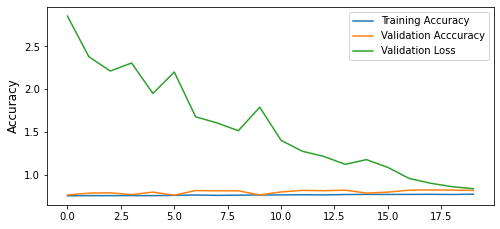

In [ ]:
initializer_xavier = tf.keras.initializers.GlorotNormal();
modelinitxav = keras.Sequential()
modelinitxav.add(InputLayer(input_shape=(150,150,3)))
modelinitxav.add(Conv2D(filters=32,kernel_size=3, activation="relu", padding="same"))
modelinitxav.add(MaxPool2D())



modelinitxav.add(Flatten())


modelinitxav.add(Dense(64, activation="relu",kernel_initializer=initializer_xavier))
modelinitxav.add(BatchNormalization())
modelinitxav.add(Dropout(rate=0.3))
modelinitxav.add(Dense(1, activation="sigmoid",kernel_initializer=initializer_xavier))



modelinitxav.compile(loss=keras.losses.binary_crossentropy, optimizer=tf.optimizers.Adam(),metrics=['accuracy'])

historyinitxav = modelinit1.fit(train,verbose=1,callbacks = [earlystopping],epochs=20,validation_data=(test))
show_accPlot(historyinitxav)

Though initializing with Xavier Initialization - GlorotNormal,performs better than the Ones initialization, comparing to our base model without any initialization it still performs badly. Accuracy of the Xavier initialized model is higher compared to Ones initialized model. Both of them start to plateau after 20 epochs

**Conclusion** <br>
We used facemask image dataset to build several CNN models and observed how making changes to the network like changing - activation function, cost function, epochs, gradient estimation techniques, number of layers and network initialization effected the the accuracy of the model

**References** <br>
https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5 <br>


https://towardsdatascience.com/exploring-activation-functions-for-neural-networks-73498da59b02 <br>


https://www.tensorflow.org/tutorials/images/cnn <br>

https://keras.io/api/callbacks/early_stopping/ <br>

https://towardsdatascience.com/how-to-initialize-a-neural-network-27564cfb5ffc <br>

https://towardsdatascience.com/useful-plots-to-diagnose-your-neural-network-521907fa2f45 <br>

https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/

**License**

Copyright (c) 2021 Kashyap Datta Kovvali

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.